In [9]:
print("Hello world")
# Shift + Enter

Hello world


In [10]:
subject = "Интенсив Skillbox Data Science - предсказание курса доллара"
print(subject)

Интенсив Skillbox Data Science - предсказание курса доллара


In [15]:
# Just test
salary = 10000
tax = 0.13
tax_amount = salary * tax
take_home = salary - tax_amount

In [16]:
print(f"C зарплаты {salary} руб., нужно заплатить {tax_amount} руб. налога и останется {take_home} руб.")

C зарплаты 10000 руб., нужно заплатить 1300.0 руб. налога и останется 8700.0 руб.


In [13]:
# удалить - Esc и два раза d

In [17]:
iphone_price = 120000
if (take_home >= iphone_price):
    print("Вы можете купить айфон")
else:
    print("К сожалению, айфон вы купить не сможете")
print("Спасибо!")

К сожалению, айфон вы купить не сможете
Спасибо!


In [18]:
income = [10000, 5000, 25000, 170000]
print(income)

[10000, 5000, 25000, 170000]


In [21]:
for i in income:
    print(f"Я получил {i*0.87} руб. дохода")

Я получил 8700.0 руб. дохода
Я получил 4350.0 руб. дохода
Я получил 21750.0 руб. дохода
Я получил 147900.0 руб. дохода


In [23]:
len(income)

4

In [24]:
sum(income)

210000

In [25]:
sum(income)/len(income)

52500.0

In [26]:
import pandas as pd
# pd - псевдоним

In [29]:
dataframe = pd.read_excel("resources/UsdRateTable.xlsx")

In [30]:
dataframe.head()

,nominal,data,curs,cdx
0,1,2018-01-10,57.0463,Доллар США
1,1,2018-01-11,56.8734,Доллар США
2,1,2018-01-12,56.9957,Доллар США
3,1,2018-01-13,56.6019,Доллар США
4,1,2018-01-16,56.3569,Доллар США


In [33]:
dataframe.curs.describe()

count    493.000000
mean      63.770695
std        3.108680
min       55.671700
25%       62.768600
50%       64.246900
75%       65.812900
max       69.974400
Name: curs, dtype: float64

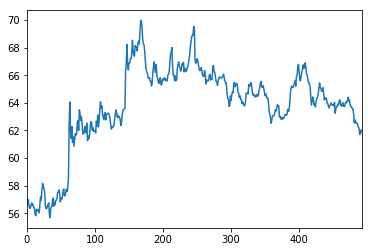

In [35]:
dataframe.curs.plot()

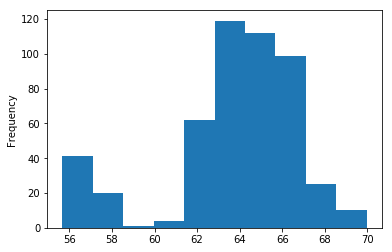

In [36]:
dataframe.curs.plot.hist()